# BASE STEP

In [ ]:
#installing dependines
!pip install --upgrade pip
!pip install wheel
#!pip install feature_selector 
#feature_selector is installed via git as it have old version of sci-kit
!pip install git+https://github.com/WillKoehrsen/feature-selector.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/WillKoehrsen/feature-selector.git to /tmp/pip-req-build-s6___6u5
  Running command git clone --filter=blob:none --quiet https://github.com/WillKoehrsen/feature-selector.git /tmp/pip-req-build-s6___6u5
  Resolved https://github.com/WillKoehrsen/feature-selector.git to commit 2f166a365182ff7ebf0e5f43ffc267926ecf1a44
  Preparing metadata (setup.py) ... done


In [ ]:
#load system variables 
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 1.03 ms (started: 2022-12-17 21:35:15 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import time
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.85 s (started: 2022-12-17 21:35:15 +00:00)


In [ ]:
inputs_path = '/content/drive/MyDrive/DTBA/inputs'
gen_inputs_path = f'{inputs_path}/generated inputs'
outputs_path = '/content/drive/MyDrive/DTBA/outputs'

time: 817 µs (started: 2022-12-17 21:35:18 +00:00)


# STEP1: Feature pre-processing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from feature_selector import FeatureSelector

time: 806 µs (started: 2022-12-17 21:35:18 +00:00)


In [ ]:
# Read features datasets

train = pd.read_excel(f'{inputs_path}/MASTER FILE (Features Combined).xlsx', sheet_name='Morgan (128) with ALL')

#train_labels = train['pKd']
print(train.shape)
display(train.head())

# Feature, target arrays
X = train.drop(["Index", "pKd"], axis=1)
y = train['pKd']


(23785, 473)


,Index,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,...,Xc2.lambda22,Xc2.lambda23,Xc2.lambda24,Xc2.lambda25,Xc2.lambda26,Xc2.lambda27,Xc2.lambda28,Xc2.lambda29,Xc2.lambda30,pKd
0,1,1,1,0,0,0,1,0,0,1,...,0.023675,0.023799,0.024054,0.022546,0.02312,0.024072,0.023134,0.023794,0.022431,7.366532
1,2,1,1,0,1,0,0,0,1,1,...,0.023675,0.023799,0.024054,0.022546,0.02312,0.024072,0.023134,0.023794,0.022431,5.000000
2,3,1,0,0,0,0,0,0,0,1,...,0.023675,0.023799,0.024054,0.022546,0.02312,0.024072,0.023134,0.023794,0.022431,5.000000
3,4,1,0,0,0,0,0,1,0,1,...,0.023675,0.023799,0.024054,0.022546,0.02312,0.024072,0.023134,0.023794,0.022431,5.000000
4,5,1,1,0,1,0,0,0,0,0,...,0.023675,0.023799,0.024054,0.022546,0.02312,0.024072,0.023134,0.023794,0.022431,5.920819


time: 2min 47s (started: 2022-12-17 21:35:18 +00:00)


In [ ]:
# Init feature selection class object with (train - (id+label) data 
fs = FeatureSelector(data = X, labels = y)

# Identify and remove missing, signle value, collinear features

fs.identify_missing(missing_threshold=0.6)
fs.identify_single_unique()
fs.identify_collinear(correlation_threshold=0.98)

# fs.unique_stats.sample(15)
# fs.missing_stats.sample(5)
# single_unique = fs.ops['single_unique']
# print("Single Unique: = ", single_unique)
# fs.plot_unique()
# print(fs.unique_stats)
# colli = fs.ops['collinear']
# print("collinear = ", colli)
# fs.plot_collinear()

train_clean = fs.remove(methods = ['missing', 'single_unique', 'collinear'])
print("Processing dataset file:")
print("Identify and removing missing feature values with 60% threshold")
print("Identify and removing single value feature columns")
print("Identify and removing collinear threshold 98%")

print("current shape feature file is = ", train_clean.shape)

# display(train_clean)
#fs.check_removal()

# train_clean["SampleName"] = train["SampleName"]
# train_clean['pKd'] = y
# #display(train_clean)

# # Save the final features into csv file
# #train_clean.to_csv("./datasets/protien_drug_all_fea_clean.csv", encoding='utf-8', index=False )

0 features with greater than 0.60 missing values.

3 features with a single unique value.

36 features with a correlation magnitude greater than 0.98.

Removed 39 features.
Processing dataset file:
Identify and removing missing feature values with 60% threshold
Identify and removing single value feature columns
Identify and removing collinear threshold 98%
current shape feature file is =  (23785, 432)
time: 9.82 s (started: 2022-12-17 21:38:05 +00:00)


In [ ]:
# Count number of zeros in all columns of Dataframe and save features with 80% zeros into a list
countgt80p = 0
zero_count_list80p = []
for column_name in train_clean.columns:
    column = train_clean[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if (count/23785) > 0.80:
        #print("============> ",column_name)
        countgt80p+=1
        zero_count_list80p.append(column_name)
    #print('Count of zeros in column ', column_name, ' is : ', count, "Percent = ", count/23785)
print("> 80%", countgt80p)
#print(len(zero_count_list80p))

> 80% 29
time: 107 ms (started: 2022-12-17 21:38:15 +00:00)


In [ ]:
print("identifying and removing cols with more that 80% zeros")
print("removing ", countgt80p, "feature cols") 
train_clean = train_clean.drop(zero_count_list80p, axis=1)
print("Final shape of features dataframe is = ", train_clean.shape)

identifying and removing cols with more that 80% zeros
removing  29 feature cols
Final shape of features dataframe is =  (23785, 403)
time: 11.9 ms (started: 2022-12-17 21:38:15 +00:00)


In [ ]:
#Save the final features into csv file
train_clean["Index"] = train["Index"]
train_clean['pKd'] = y
display(train_clean.head())
train_clean.to_csv(f'{outputs_path}/protien_drug_all_fea_clean.csv', encoding='utf-8', index=False )
train_clean.to_csv(f'{gen_inputs_path}/protien_drug_all_fea_clean.csv', encoding='utf-8', index=False )

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_8,Col_9,Col_10,...,Xc2.lambda23,Xc2.lambda24,Xc2.lambda25,Xc2.lambda26,Xc2.lambda27,Xc2.lambda28,Xc2.lambda29,Xc2.lambda30,Index,pKd
0,1,1,0,0,0,1,0,1,0,0,...,0.023799,0.024054,0.022546,0.02312,0.024072,0.023134,0.023794,0.022431,1,7.366532
1,1,1,0,1,0,0,0,1,0,1,...,0.023799,0.024054,0.022546,0.02312,0.024072,0.023134,0.023794,0.022431,2,5.000000
2,1,0,0,0,0,0,0,1,0,1,...,0.023799,0.024054,0.022546,0.02312,0.024072,0.023134,0.023794,0.022431,3,5.000000
3,1,0,0,0,0,0,1,1,0,1,...,0.023799,0.024054,0.022546,0.02312,0.024072,0.023134,0.023794,0.022431,4,5.000000
4,1,1,0,1,0,0,0,0,1,1,...,0.023799,0.024054,0.022546,0.02312,0.024072,0.023134,0.023794,0.022431,5,5.920819


time: 18.2 s (started: 2022-12-17 21:38:15 +00:00)


In [ ]:
%unload_ext autotime

# STEP2: Recursive Feature Elimination (If needed)

In [ ]:
# from numpy import mean
# from numpy import std
# from array import array
# import time
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import RandomForestRegressor
# from feature_selector import FeatureSelector

# SEED = 42

In [ ]:
# # Read features datasets

# train = pd.read_csv(f'{gen_inputs_path}/protien_drug_all_fea_clean.csv')
# train_labels = train['pKd']
# print(train.shape)
# display(train.head())

# # Feature, target arrays
# X = train.drop(["Index", "pKd"], axis=1)
# y = train['pKd']

# # Train/test set generation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# # Scale train and test sets with StandardScaler
# X_train_std = StandardScaler().fit_transform(X_train)
# X_test_std = StandardScaler().fit_transform(X_test)

# # Fix the dimensions of the target array make them 1*1 vector
# # y_train = y_train.values.reshape(-1, 1)
# # y_test = y_test.values.reshape(-1, 1)



In [ ]:
# from sklearn.feature_selection import RFECV

# # Init, fit
# rfecv = RFECV(
#     estimator=RandomForestRegressor(),
#     min_features_to_select=5,
#     step=5,
#     n_jobs=-1,
#     scoring="r2",
#     cv=5,
# )

# _ = rfecv.fit(X_train_std, y_train)

# X_train.columns[rfecv.support_]

In [ ]:
# #X_train_std = pd.DataFrame(X_train_std)
# print("Optimum number of features: %d" % rfecv.n_features_)
# print(X_train.columns[rfecv.support_])
# # Build X_sel dataframe from selected features
# selected_features = rfecv.get_support(1)
# print("Selected Features = ",selected_features)
# X_sel = train[train.columns[selected_features]]
# print(X_sel.shape)
# display(X_sel.head())
# print("--------------------------------------------")
# mask = rfecv.get_support()
# features = np.array((X_train.columns), dtype=np.dtype('a16'))
# best_features = features[mask] 
# #print("All features: ", X.shape[1])
# #print(features)

# print("Selected best: ", best_features.shape[0])
# print(features[mask])

# X_sel["Index"] = train["Index"]
# X_sel['pKd'] = y
# display(X_sel.head())
# print(X_sel.shape)

In [ ]:
# #Save the final features into csv file
# X_sel.to_csv(f'{gen_inputs_path}/protien_drug_all_fea_clean.csv', encoding='utf-8', index=False )

# STEP3: Regression

In [ ]:
# Refer to # https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm for more info
# Installing relevant libraries

!pip install catboost
!pip install lifelines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import BayesianRidge
from lifelines.utils import concordance_index

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pro_drug = pd.read_csv(f'{gen_inputs_path}/protien_drug_all_fea_clean.csv')
print(pro_drug.shape)
pro_drug.info()
pro_drug.describe()
pro_drug.columns

(23785, 405)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Columns: 405 entries, Col_0 to pKd
dtypes: float64(308), int64(97)
memory usage: 73.5 MB


Index(['Col_0', 'Col_1', 'Col_2', 'Col_3', 'Col_4', 'Col_5', 'Col_6', 'Col_8',
       'Col_9', 'Col_10',
       ...
       'Xc2.lambda23', 'Xc2.lambda24', 'Xc2.lambda25', 'Xc2.lambda26',
       'Xc2.lambda27', 'Xc2.lambda28', 'Xc2.lambda29', 'Xc2.lambda30', 'Index',
       'pKd'],
      dtype='object', length=405)

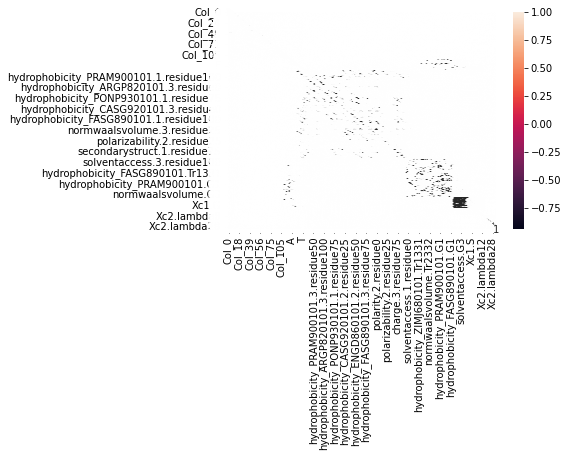

In [ ]:
sns.heatmap(pro_drug.corr(), annot=True)

In [ ]:
X = pro_drug.drop(["Index","pKd"], axis=1)
y = pro_drug['pKd']
print(X.shape)
print(y.shape)

(23785, 403)
(23785,)


In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    ci = concordance_index(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('CI', ci)

    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    ci = concordance_index(true, predicted)
    return mae, mse, rmse, r2_square, ci

In [ ]:
RANDOM_STATE=42

Regressor_names = ["Linear Regression",
                    "Ridge",
                    "Lasso", 
                    "Elastic Net", 
                    # "Polynomial Features", 
                    # "SGDRegressor", 
                    # "Random Forest", 
                    # "SVR", 
                    "CatBoost", 
                    "XGBoost", 
                    "LGBMRegressor", 
                    "BayesianRidge"
                  ]

Regressors = [   LinearRegression(),
                 Ridge(alpha = 1/(10**13), solver='cholesky', tol=0.0001, random_state=RANDOM_STATE),
                 Lasso(alpha=0.1, precompute=True, warm_start=True, positive=True, selection='random', random_state=RANDOM_STATE),
                 ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=RANDOM_STATE),
                 #PolynomialFeatures(degree=2),
                 #SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000, random_state=RANDOM_STATE),
                 #RandomForestRegressor(n_estimators=1000, random_state=RANDOM_STATE),
                 #SVR(kernel='rbf', C=1000000, epsilon=0.001, random_state=RANDOM_STATE),
                 CatBoostRegressor(iterations=1000, learning_rate=0.1, verbose=False, random_state=RANDOM_STATE),
                 XGBRegressor(random_state=RANDOM_STATE),
                 LGBMRegressor(random_state=RANDOM_STATE),
                 BayesianRidge()
            ]

In [ ]:
# Read input file

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("X_train = ", X_train.shape, "X_test = ", X_test.shape)

X_train =  (21406, 403) X_test =  (2379, 403)


Model Name:  Linear Regression
Test set evaluation:
______________________________________
MAE: 0.42536243207073077
MSE: 0.4414005497069839
RMSE: 0.6643798233743887
R2 Square 0.3257039809824863
CI 0.7898750077741034
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4216680314049723
MSE: 0.4270583124956059
RMSE: 0.6534969873653633
R2 Square 0.3602482772539005
CI 0.8067928103023805
__________________________________
Model Name:  Ridge
Test set evaluation:
______________________________________
MAE: 0.4253616112031252
MSE: 0.4414017083053592
RMSE: 0.6643806953135823
R2 Square 0.32570221107469477
CI 0.789879614650173
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4216671791911027
MSE: 0.4270583104518259
RMSE: 0.6534969858016377
R2 Square 0.3602482803155709
CI 0.806792098809009
__________________________________
Model Name:  Lasso
Test set evaluation:
__________________________________

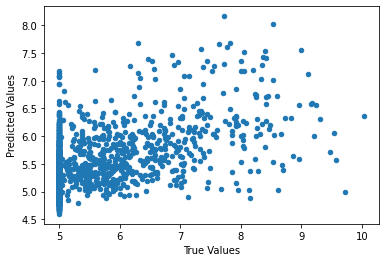

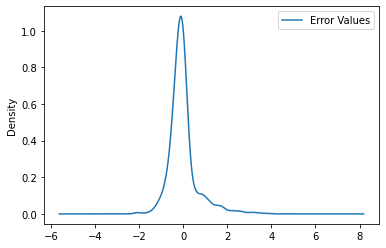

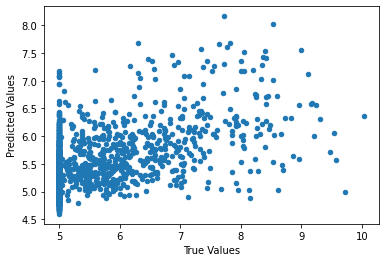

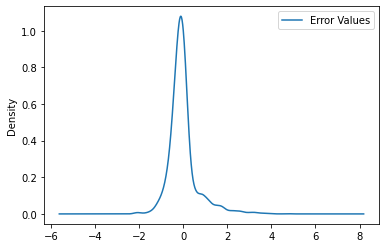

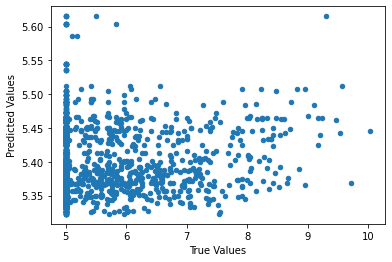

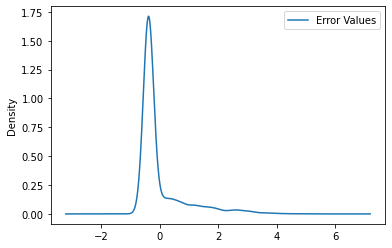

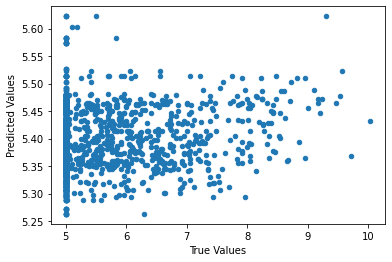

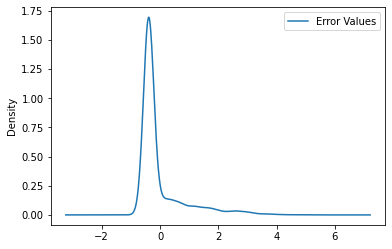

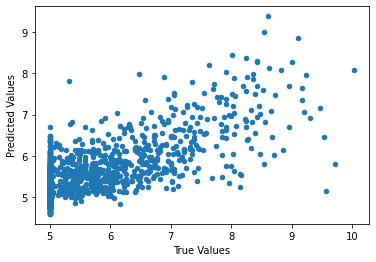

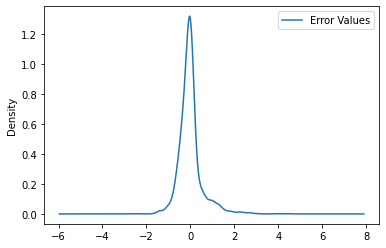

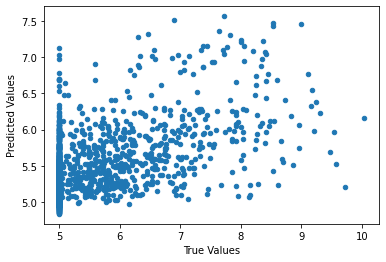

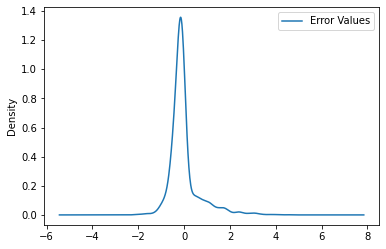

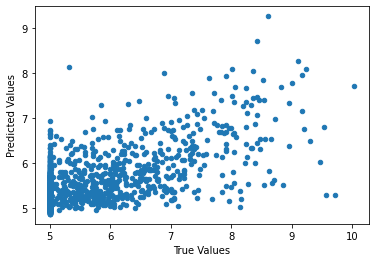

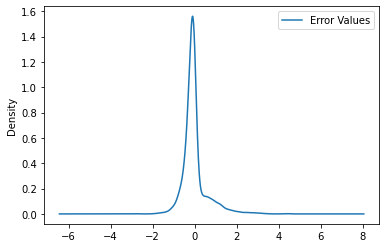

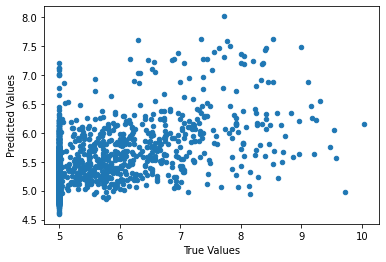

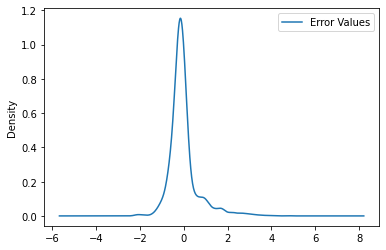

In [ ]:
results_df = pd.DataFrame()
for rname, regs in zip(Regressor_names, Regressors):
    print("Model Name: ",rname)
    model = regs
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).plot.scatter(x='True Values', y='Predicted Values')
    pd.DataFrame({'Error Values': (y_test - pred)}).plot.kde()
    test_pred  = model.predict(X_test)
    train_pred = model.predict(X_train)
    print('Test set evaluation:\n______________________________________')
    print_evaluate(y_test, test_pred)
    print('Train set evaluation:\n_____________________________________')
    print_evaluate(y_train, train_pred)
    CI = concordance_index(y_test, pred)

    results_df_2 = pd.DataFrame(data=[[rname, *evaluate(y_test, test_pred) , cross_val(model)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', "R Square", "CI", "Cross Validation"])
#     results_df = results_df.append(results_df_2, ignore_index=True)
    
#     df         = pd.concat([results_df, df_new_row])
    results_df = pd.concat([results_df, results_df_2], ignore_index=True)

    # results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
    #                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])


In [ ]:
results_df

,Model,MAE,MSE,RMSE,R Square,CI,Cross Validation
0,Linear Regression,0.425362,0.441401,0.664380,0.325704,0.789875,-0.310142
1,Ridge,0.425362,0.441402,0.664381,0.325702,0.789880,-0.310089
2,Lasso,0.566094,0.649537,0.805938,0.007750,0.545929,-0.003576
3,Elastic Net,0.564916,0.647099,0.804425,0.011473,0.558714,-0.002053
4,CatBoost,0.341501,0.284148,0.533055,0.565928,0.859254,0.264181
5,XGBoost,0.413838,0.434012,0.658796,0.336991,0.791637,0.244790
6,LGBMRegressor,0.356894,0.342445,0.585188,0.476871,0.827839,0.274219
7,BayesianRidge,0.426653,0.451453,0.671903,0.310347,0.786742,0.151299


In [ ]:
results_df.to_csv(f'{outputs_path}/results.csv', encoding='utf-8', index=False )

In [ ]:
# results_df.set_index('Model', inplace=True)
results_df["CI"].plot(kind='barh',title="CI for all Models", figsize=(12, 8))
plt.grid(axis = 'x')

# STEP4: Stacking Regressors

In [ ]:
from sklearn.ensemble import StackingRegressor

estimators = [('CB'  , CatBoostRegressor(random_state=42)), 
              ('LGBM', LGBMRegressor(random_state=42)),
              ('XGB' , XGBRegressor(random_state=42)),
              ('RF'  , RandomForestRegressor(n_estimators=1000, random_state=42))
             ]
reg = StackingRegressor(estimators=estimators,
                        final_estimator=RandomForestRegressor(n_estimators=10,
                                                              random_state=42)
                       )

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE=42

# Read input datafile
pro_drug = pd.read_csv(f'{gen_inputs_path}/protien_drug_all_fea_clean.csv')

X = pro_drug.drop(["Index","pKd"], axis=1)
y = pro_drug['pKd']
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_STATE)

pipeline = Pipeline([('std_scalar', StandardScaler())])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

reg.fit(X_train, y_train).score(X_test, y_test)

(23785, 403)
(23785,)
Learning rate set to 0.066436
0:	learn: 0.8046000	total: 162ms	remaining: 2m 41s
1:	learn: 0.7937485	total: 245ms	remaining: 2m 2s
2:	learn: 0.7841828	total: 326ms	remaining: 1m 48s
3:	learn: 0.7755030	total: 417ms	remaining: 1m 43s
4:	learn: 0.7654399	total: 500ms	remaining: 1m 39s
5:	learn: 0.7574564	total: 575ms	remaining: 1m 35s
6:	learn: 0.7515179	total: 647ms	remaining: 1m 31s
7:	learn: 0.7445243	total: 728ms	remaining: 1m 30s
8:	learn: 0.7392707	total: 805ms	remaining: 1m 28s
9:	learn: 0.7346327	total: 881ms	remaining: 1m 27s
10:	learn: 0.7302575	total: 961ms	remaining: 1m 26s
11:	learn: 0.7262579	total: 1.03s	remaining: 1m 25s
12:	learn: 0.7214827	total: 1.11s	remaining: 1m 24s
13:	learn: 0.7168467	total: 1.19s	remaining: 1m 24s
14:	learn: 0.7128686	total: 1.27s	remaining: 1m 23s
15:	learn: 0.7088920	total: 1.35s	remaining: 1m 23s
16:	learn: 0.7061059	total: 1.44s	remaining: 1m 23s
17:	learn: 0.7042731	total: 1.51s	remaining: 1m 22s
18:	learn: 0.7014789	to